# 임산부석에 임산부는 얼마나 앉을까?  

### 부제 : 임산부석에 앉는 당신을 지켜보고 있다
지하철 내 임산부 좌석을 배려석으로 볼 것인가? 임산부 전용 좌석으로 볼 것인가?<br>
임산부석에 대한 사회적 합의가 완전하게 이루어지지 않은 지금, 다양한 방식으로 임산부석을 둘러싼 갈등이 표출되고 있다.<br>
이에 데잇걸즈 3기 한단비, 이보민, 전재민, 윤한솔, 이미현, 박현미는 실제 임산부석 이용자와 열차 내의 다양한 요소를<br>
관찰하여 얻은 데이터로 열차 내 환경 및 임산부석 좌석 이용자에 관한 분석을 실시하였다.

## 가설
### 관찰로 얻은 데이터를 통해 알 수 있는 정보는 어떤 것이 있을까?
1. 전체 임산부석 착석자 중 실제 임산부 비율
2. 임산부석 착석자 성별 
3. 임산부석 착석자의 행동
4. 붐빔정도와 임산부석 착석과의 상관관계
5. 호선별 임산부석이 비어있는 비율
6. 노년 이용자의 임산부석 착석과 노약자석 빈자리 여부의 관계
7. 무거운 짐의 여부와 임산부석 착석자의 상관 관계
8. 일반석이 남아있을때 임산부석에 앉아있는 사람의 성별, 나이대 등의 정보

# 데이터 수집 방법
 지하철을 이용하는 팀원이 탑승하는 칸 내의 임산부석(각 칸에 2좌석)을 관찰, 탑승자 및 비어있는 구간과 열차내 붐빔 정도 등을 직접 시트에 입력
 
### 수집 기간 : 2019-07-31 ~ 2019-08-16
### 수집의 한계
시간대가 모두 출퇴근 시간에만 조사됨<br>
모든 호선을 조사하지 못했다<br>
임산부 뱃지가 없으면 임산부인지 알기 힘듦<br>
붐빌 경우 노약자석 확인이 어려웠음<br>
연령대와 임신여부의 주관적 해석
수집과정에서 수집 형태가 바뀌어 생긴 결측치<br>
\**모든 호선, 모든 시간,  모든 칸을 조사하지 못했으나, 임산부석 착석자 관찰 조사 데이터의 시작임을 감안해주세요* *


---

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter
import matplotlib
print(matplotlib.__version__)
import pylab

import requests
from ipywidgets import Image
from matplotlib import font_manager, rc
sns.set(style="whitegrid", rc={'font.family':'AppleGothic', 'figure.figsize': (12, 5)}, font_scale=1.4)

3.1.0


In [3]:
table = pd.read_csv('meerkat_processed.csv')

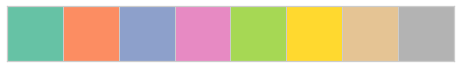

In [4]:
pal = sns.color_palette("Set2")
sns.palplot(pal)
sns.set_palette(pal)

# Graphic model

![img](https://i.imgur.com/ru0w38v.png)

# Data description

### 기록
1. date : 기록 날짜
2. time : 기록 시간
3. line : 탑승 호선
4. start : 기록자의 탑승역
5. stop : 기록자의 하차역

### 붐빔 정도 
6. crowdedness : E, N, F로 분류
7. E : 널널 (비어있는 일반석이 있는 경우)
8. N : 보통 (비어있는 일반석이 없고 서 있는 승객이 20명 미만)
9. F : 가득참 (서 있는 승객 20명 이상)
10. is_old_seat_empty : 노약자석 빈자리 여부
    * 0 : 빈자리 없음
    * 1 : 빈자리 있음

### 임산부석 착석 여부 및 성별
11. is_p_seat_empty : 임산부석 빈자리 여부
    * 0 : 빈자리 없음
    * 1 : 빈자리 있음
12. p_seat_empty_count : 임산부석이 비어있는 상태로 지나간 역의 개수
13. female : 착석자 성별이 여성
14. male : 착석자 성별이 남성

### 착석자 연령
15. age : 착석자 연령 (어린이, 청소년, 청년, 중년, 노년)
16. child : 어린이 ~13살
17. teenage : 청소년 14~19살
18. youth : 청년 20, 30대
19. middle_age : 중년 40대~65세 이전
20. old_age : 노년 65세 이후

### 착석자 임신 여부
21. badge :  임산부 엠블럼 소지 여부
22. pregnant : 임신 여부

### 짐 여부
23. heavy : 무거운 짐을 가지고 있는지 여부
    * 노트북이 들어가는 크기의 가방부터 무거운 짐으로 간주

### 착석자 행동
24. behavior1 : 행동 종류 1
25. behavior2 : 행동 종류 2
26. behavior3 : 행동 종류 3 **한 사람이 여러 행동을 했을 경우*
27. cellphone : 핸드폰을 이용함
28. thinking : 멍 때리기
29. sleep : 잠
30. earphone : 이어폰 사용
31. talking : 이야기 함
32. calling : 전화통화
33. reading : 무엇인가를 읽음
34. makeup : 화장하기
35. eating : 먹기
36. writing : 무엇인가를 작성하기

In [135]:
table.head(1)

,Unnamed: 0,date,time,line,start,stop,crowdedness,E,N,F,...,thinking,sleep,earphone,talking,calling,reading,makeup,eating,writing,sex
0,0,2019-07-31,19:10:00,5,공덕,여의도,N,0,1,0,...,0,0,1,0,0,0,0,0,0,여


In [136]:
table.dtypes

Unnamed: 0                     int64
date                  datetime64[ns]
time                          object
line                           int64
start                         object
stop                          object
crowdedness                   object
E                              int64
N                              int64
F                              int64
is_old_seat_empty              int64
is_p_seat_empty                int64
p_seat_empty_count           float64
female                         int64
male                           int64
age                           object
child                        float64
teenage                      float64
youth                        float64
middle_age                   float64
old_age                      float64
badge                        float64
pregnant                     float64
heavy                        float64
behavior1                     object
behavior2                     object
behavior3                     object
c

In [137]:
table["date"] = pd.to_datetime(table['date']) #날짜 데이터 타입 변경

In [138]:
# 데이터가 언제부터 언제까지 있는지? min(), max() 함수
print('데이터 기록 기간')
print('시작:',(table['date']).min())
print('끝:',(table['date']).max())

데이터 기록 기간
시작: 2019-07-31 00:00:00
끝: 2019-08-16 00:00:00


In [139]:
# 데이터의 총 갯수
print('데이터의 총 갯수 : ',(len(table['date'])))

데이터의 총 갯수 :  833


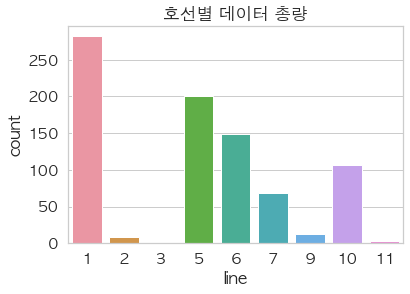

In [140]:
sns.countplot(x="line", data=table)
plt.title("호선별 데이터 총량")
plt.show()

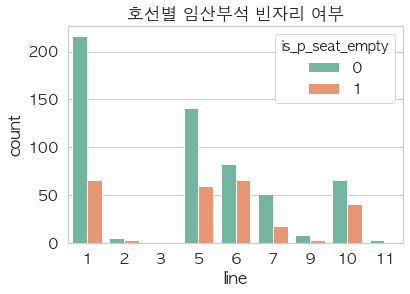

In [141]:
sns.countplot(x="line", hue="is_p_seat_empty", data=table)
plt.title("호선별 임산부석 빈자리 여부")
plt.show()

----
# 1. 임산부석 착석자 분석

In [142]:
print('관찰한 좌석 수 : ',(len(table['date'])))
print('착석자가 있는 좌석 수:',table[table['is_p_seat_empty']==0]['is_p_seat_empty'].count(),'개, 전체 중',round(len(table[table['is_p_seat_empty']==0]) / len(table) * 100),'%') #비어있는 좌석 수
print('비어있는 좌석 수:',table[table['is_p_seat_empty']==1]['is_p_seat_empty'].count(),'개, 전체 중',round(len(table[table['is_p_seat_empty']==1]) / len(table) * 100),'%') 

관찰한 좌석 수 :  833
착석자가 있는 좌석 수: 576 개, 전체 중 69 %
비어있는 좌석 수: 257 개, 전체 중 31 %


Text(0, 0.5, '')

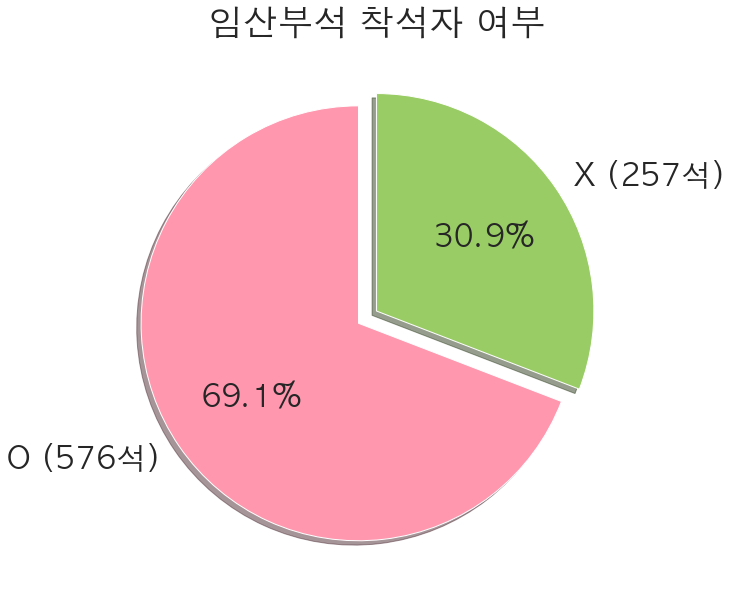

In [143]:
labels=['O (576석)', 'X (257석)']
table.groupby('is_p_seat_empty')['is_p_seat_empty'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 30)
plt.title('임산부석 착석자 여부', fontsize=35)
pylab.ylabel('')

## 1-1. 임산부석 착석한 임산부 분석

In [144]:
# full: 임산부석에 착석자가 있는 행만 뽑은 테이블
full = table[table['is_p_seat_empty']==0]

print('착석자가 있는 좌석 수 576개 중', len(full[full['pregnant']==1]),'개 좌석이 임산부, 총',round(len(full[full['pregnant']==1]) / len(full) * 100),'%')

착석자가 있는 좌석 수 576개 중 26 개 좌석이 임산부, 총 5 %


Text(0, 0.5, '')

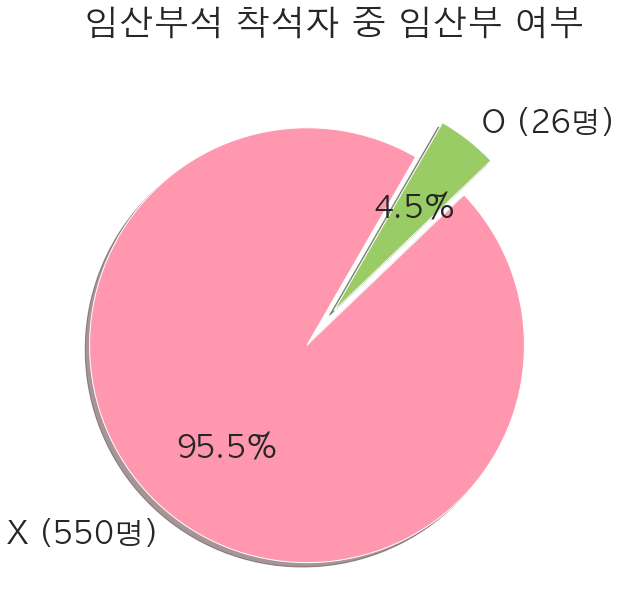

In [145]:
full = table[table['is_p_seat_empty']==0]
labels=['X (550명)', 'O (26명)']
full.groupby('pregnant')['pregnant'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.2,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 30)
plt.title('임산부석 착석자 중 임산부 여부', fontsize=35)
pylab.ylabel('')

### 1-1-1. 임산부석을 이용한 임산부의 엠블럼 소지 여부

Text(0, 0.5, '')

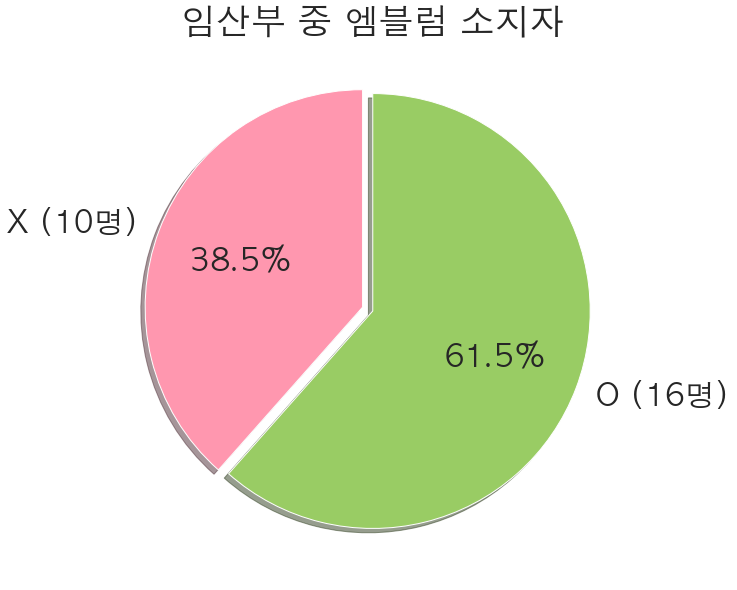

In [146]:
preg = table[table['pregnant']==1]
labels=['X (10명)', 'O (16명)']
preg.groupby('badge')['badge'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.05,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 30)
plt.title('임산부 중 엠블럼 소지자', fontsize=35)
pylab.ylabel('')

In [147]:
num_prg= table[table["pregnant"] == 1]["pregnant"].count()

In [148]:
table[table["pregnant"] == 1]["pregnant"].count()

26

In [149]:
num_prg_bdg = table[table["badge"] == 1]["badge"].count()

In [150]:
table[table["badge"] == 1]["badge"].count()

16

In [151]:
num_prg_bdg/num_prg

0.6153846153846154

----
## 1-2. 임산부석 착석한 비임산부 분석

In [152]:
print('착석자가 있는 좌석 수 576개 중', len(full[full['pregnant']==0]),'개 좌석이 임산부, 총',round(len(full[full['pregnant']==0]) / len(full) * 100),'%')

착석자가 있는 좌석 수 576개 중 550 개 좌석이 임산부, 총 95 %


In [153]:
# not_p: 임산부석 착석자가 비임산부인 행만 뽑은 테이블
not_p = full[full['pregnant']==0]

In [154]:
# 임산부석 착석자가 비임산부일 경우의 수와 비율
len(not_p)

550

In [155]:
len(not_p)/len(full) * 100

95.48611111111111

### 1-2-1. 비임산부 착석자 성별과 비율

Text(0, 0.5, '')

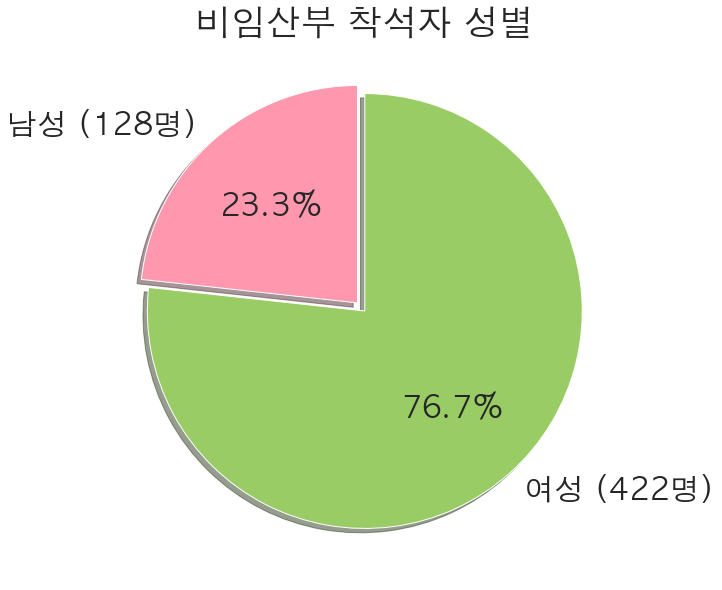

In [156]:
table['sex'] = table['female'].apply(lambda x: "여" if x == 1 else "남" if x == 0 else '')
table['sex'] = table['sex'].replace("",np.nan, regex=True)
full = table[table['is_p_seat_empty']==0]
not_p = full[full['pregnant']==0]
labels=['남성 (128명)', '여성 (422명)']
not_p.groupby('sex')['sex'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.05,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 30)
plt.title('비임산부 착석자 성별', fontsize=35)
pylab.ylabel('')

In [157]:
# 성별
print('여성 착석자 수:', (len(not_p[not_p['female']==1])),'명')
print('여성 착석 비율:', (round(len(not_p[not_p['female']==1])/len(not_p)*100)),'%')
print('남성 착석자 수:', (len(not_p[not_p['male']==1])),'명')
print('남성 착석 비율:', (round(len(not_p[not_p['male']==1])/len(not_p)*100)),'%')

여성 착석자 수: 422 명
여성 착석 비율: 77 %
남성 착석자 수: 128 명
남성 착석 비율: 23 %


### 1-2-2. 비임산부 착석자 나이

In [158]:
# 연령대 (인원 수, 단위 : 명)
not_p_age_num = not_p.groupby('age')['date'].count()
not_p_age_per =not_p_age_num.apply(lambda x: x / len(not_p) * 100).round(2)
not_p_age_df = pd.DataFrame([not_p_age_num, not_p_age_per]).T
not_p_age_df.columns = [['개수', '비율(%)']]
not_p_age_df['개수'] = not_p_age_df['개수'].astype(int)
not_p_age_df.index.name = '연령대'
not_p_age_df.reset_index()

,연령대,개수,비율(%)
0,노년,100,18.18
1,어린이,11,2.00
2,중년,231,42.00
3,청년,202,36.73
4,청소년,6,1.09


Text(0, 0.5, '')

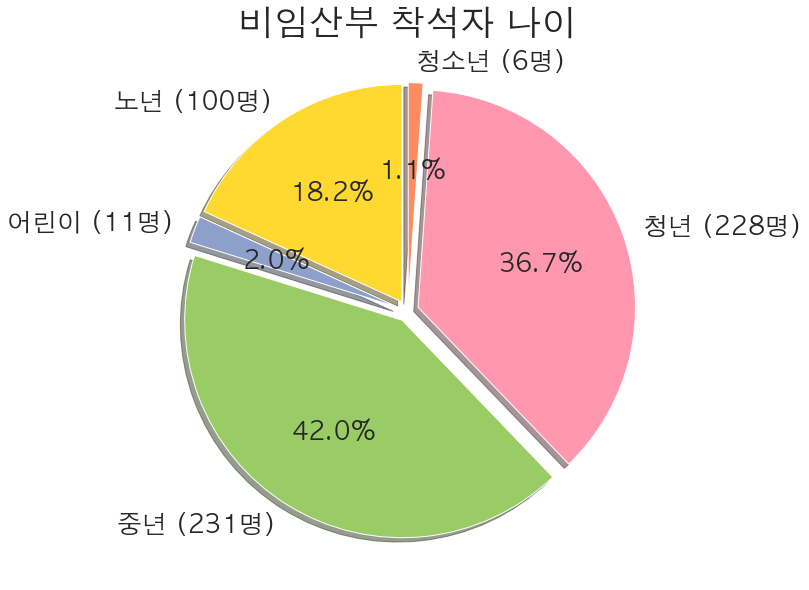

In [159]:
labels=['노년 (100명)', '어린이 (11명)', '중년 (231명)', '청년 (228명)', '청소년 (6명)']
not_p.groupby('age')['date'].count().plot.pie(labels = labels
                    ,colors= ['#FFD92F','#8DA0CB','#99CC64','#FF97AF', '#FC8D62']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.05,0.05,0.05,0.05,0.05) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 25)
plt.title('비임산부 착석자 나이', fontsize=35)
pylab.ylabel('')

In [160]:
# 연령대 (비율)
full.groupby('age')['date'].count().apply(lambda x: x / len(full) * 100)

age
노년     17.361111
어린이     1.909722
중년     40.104167
청년     39.583333
청소년     1.041667
Name: date, dtype: float64

### 1-2-3. 비임산부 행동 분석

In [161]:
# 1가지 이상의 행동을 하고 있는 사람의 수: 550명
# 2가지 이상의 행동을 하고 있는 사람의 수: 59명
# 3가지 이상의 행동을 하고 있는 사람의 수: 1명
# 2가지 또는 3가지의 행동을 동시에 하고 있는 사람을 각각 2명 또는 3명으로 간주하고 60개의 행을 추가할 예정
print(len(not_p[~not_p['behavior1'].isnull()]))
print(len(not_p[~not_p['behavior2'].isnull()]))
print(len(not_p[~not_p['behavior3'].isnull()]))

550
59
1


In [162]:
behavior1_df = not_p[~not_p['behavior1'].isnull()].loc[:,'date':'behavior1']
behavior1_df = behavior1_df.rename(columns = {'behavior1':'behavior'})
behavior2_df = not_p[~not_p['behavior2'].isnull()].loc[:,'date':'behavior2'].drop(['behavior1'], axis=1)
behavior2_df = behavior2_df.rename(columns = {'behavior2':'behavior'})
behavior3_df = not_p[~not_p['behavior3'].isnull()].loc[:,'date':'behavior3'].drop(['behavior1','behavior2'], axis=1)
behavior3_df = behavior3_df.rename(columns = {'behavior3':'behavior'})

In [163]:
behavior_df = behavior1_df.append(behavior2_df).append(behavior3_df)
len(behavior_df)

610

In [164]:
# 비율은 원래 전체 인원 수인 550로 나눠 구함 (total>100)
not_p_behavior_num = behavior_df.groupby('behavior')['date'].size().sort_values(ascending=False)
not_p_behavior_per = not_p_behavior_num.apply(lambda x: x / len(behavior1_df) *100).round(2).sort_values(ascending=False)
not_p_behavior_df = pd.DataFrame([not_p_behavior_num, not_p_behavior_per]).T
not_p_behavior_df.columns = [['개수', '비율(%)']]
not_p_behavior_df['개수'] = not_p_behavior_df['개수'].astype(int)
not_p_behavior_df.index.name = '행동'
not_p_behavior_df.reset_index()

,행동,개수,비율(%)
0,핸드폰,302,54.91
1,멍,104,18.91
2,잠,93,16.91
3,이어폰,56,10.18
4,대화,31,5.64
5,통화,7,1.27
6,독서,7,1.27
7,먹기,4,0.73
8,화장,3,0.55
9,필기,3,0.55


#### 1-2-3-1. 비임산부 행동 분석 -연령별

In [165]:
#노년층
behavior_old_age = pd.DataFrame(behavior_df[behavior_df['old_age']==1].groupby('behavior')['date'].size()).rename(columns = {'date':'인원(명)'})
behavior_old_age['비율(%)'] = round(behavior_old_age['인원(명)']/len(behavior_df[behavior_df['old_age']==1]) * 100, 2)
behavior_old_age.index_name = '행동'
behavior_old_age.sort_values(by='인원(명)', ascending=False).reset_index()

,behavior,인원(명),비율(%)
0,멍,47,44.34
1,핸드폰,25,23.58
2,잠,20,18.87
3,대화,5,4.72
4,이어폰,4,3.77
5,독서,3,2.83
6,통화,1,0.94
7,필기,1,0.94


In [166]:
#중년층
behavior_middle_age = pd.DataFrame(behavior_df[behavior_df['middle_age']==1].groupby('behavior')['date'].size()).rename(columns = {'date':'인원(명)'})
behavior_middle_age['비율(%)'] = round(behavior_middle_age['인원(명)']/len(behavior_df[behavior_df['middle_age']==1]) * 100, 2)
behavior_middle_age.index_name = '행동'
behavior_middle_age.sort_values(by='인원(명)', ascending=False).reset_index()

,behavior,인원(명),비율(%)
0,핸드폰,129,50.79
1,멍,43,16.93
2,잠,39,15.35
3,이어폰,20,7.87
4,대화,14,5.51
5,독서,3,1.18
6,통화,3,1.18
7,먹기,2,0.79
8,필기,1,0.39


In [167]:
#청년층
behavior_youth = pd.DataFrame(behavior_df[behavior_df['youth']==1].groupby('behavior')['date'].size()).rename(columns = {'date':'인원(명)'})
behavior_youth['비율(%)'] = round(behavior_youth['인원(명)']/len(behavior_df[behavior_df['youth']==1]) * 100, 2)
behavior_youth.index_name = '행동'
behavior_youth.sort_values(by='인원(명)', ascending=False).reset_index()

,behavior,인원(명),비율(%)
0,핸드폰,139,59.91
1,잠,34,14.66
2,이어폰,31,13.36
3,멍,12,5.17
4,대화,6,2.59
5,통화,3,1.29
6,화장,3,1.29
7,먹기,2,0.86
8,독서,1,0.43
9,필기,1,0.43


In [168]:
#청소년
behavior_teenage = pd.DataFrame(behavior_df[behavior_df['teenage']==1].groupby('behavior')['date'].size()).rename(columns = {'date':'인원(명)'})
behavior_teenage['비율(%)'] = round(behavior_teenage['인원(명)']/len(behavior_df[behavior_df['teenage']==1]) * 100, 2)
behavior_teenage.index_name = '행동'
behavior_teenage.sort_values(by='인원(명)', ascending=False).reset_index()

,behavior,인원(명),비율(%)
0,핸드폰,5,83.33
1,대화,1,16.67


In [169]:
#어린이
behavior_child = pd.DataFrame(behavior_df[behavior_df['child']==1].groupby('behavior')['date'].size()).rename(columns = {'date':'인원(명)'})
behavior_child['비율(%)'] = round(behavior_child['인원(명)']/len(behavior_df[behavior_df['child']==1]) * 100, 2)
behavior_child.index_name = '행동'
behavior_child.sort_values(by='인원(명)', ascending=False).reset_index()

,behavior,인원(명),비율(%)
0,대화,5,41.67
1,핸드폰,4,33.33
2,멍,2,16.67
3,이어폰,1,8.33


### 1-2-4. 노년 이용자와 노약자석 빈자리 여부
임산부석 이용자 중 노년 이용자 수 : 100 명

In [170]:
table[table['old_age']==1]['is_old_seat_empty'].value_counts()

0    52
1    48
Name: is_old_seat_empty, dtype: int64

Text(0, 0.5, '')

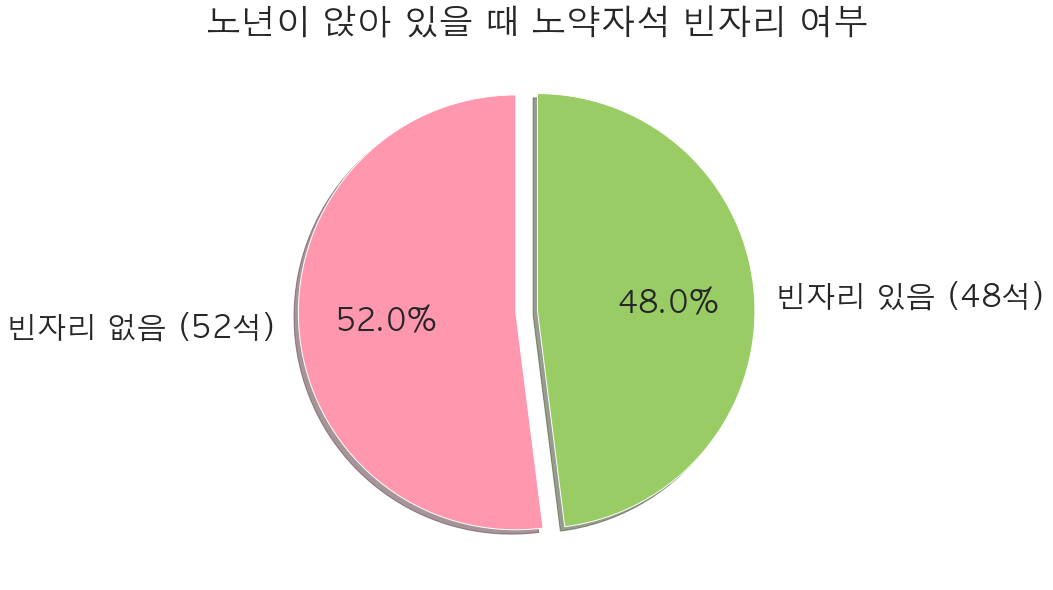

In [171]:
labels=['빈자리 없음 (52석)', '빈자리 있음 (48석)']
table.loc[table['old_age'] == 1,'is_old_seat_empty'].reset_index().groupby('is_old_seat_empty')['is_old_seat_empty'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 30)
plt.title('노년이 앉아 있을 때 노약자석 빈자리 여부', fontsize=35)
pylab.ylabel('')

In [172]:
table[['old_age','is_old_seat_empty']].groupby(['old_age','is_old_seat_empty'])['is_old_seat_empty'].count()

old_age  is_old_seat_empty
0.0      0                    280
         1                    196
1.0      0                     52
         1                     48
Name: is_old_seat_empty, dtype: int64

In [173]:
oldage_oldageseat = table.loc[table['old_age'] == 1,'is_old_seat_empty'].reset_index().groupby('is_old_seat_empty')['is_old_seat_empty'].count()

In [174]:
oldage_oldageseat

is_old_seat_empty
0    52
1    48
Name: is_old_seat_empty, dtype: int64

In [175]:
#노인이 임산부석에 앉았고, 노약자석 중 빈 자리가 없을 때의 비율
print(str(int(oldage_oldageseat[0]/(oldage_oldageseat[0] + oldage_oldageseat[1])*100))+'%')

52%


In [176]:
#노인이 임산부석에 앉았고, 노약자석 중 빈자리가 있을 때의 의 비율
print(str(int(oldage_oldageseat[1]/(oldage_oldageseat[0] + oldage_oldageseat[1])*100))+'%')

48%


#### 1-2-4-1. 노약자석 빈자리 여부와 노년 이용자 착석 여부-호선별

In [177]:
old_age = table[table['old_age'] == 1]

In [178]:
table.line.unique()

array([ 5,  9, 10,  6,  1,  7,  2, 11,  3])

In [179]:
# 노년 테이블 생성
df_old_age = pd.DataFrame(old_age.groupby(['line','is_old_seat_empty'])['date'].count()).reset_index()
df_old_age.columns = [['호선', '노약자석 빈자리(개)','임산부석 노년 이용자(명)']]
df_old_age['노약자석 빈자리(개)'] = pd.Series(['없음', '있음', '없음', '있음', '없음', '있음', '없음', '있음', '없음', '없음', '있음'])
df_old_age

,호선,노약자석 빈자리(개),임산부석 노년 이용자(명)
0,1,없음,21
1,1,있음,22
2,5,없음,18
3,5,있음,10
4,6,없음,3
5,6,있음,9
6,7,없음,3
7,7,있음,4
8,9,없음,2
9,10,없음,5


In [180]:
pd.DataFrame(old_age[['line','old_age','is_old_seat_empty']].groupby(['line','old_age','is_old_seat_empty'])['is_old_seat_empty'].count()[0:2])
# 1호선의 경우 
# 노약자석 빈자리가 없을 때 임산부석 이용자 21명
# 노약자석 빈자리가 있을 때 임산부석 이용자 22명

is_old_seat_empty
line old_age is_old_seat_empty                   
1    1.0     0                                 21
             1                                 22

In [181]:
pd.DataFrame(old_age[['line','old_age','is_old_seat_empty']].groupby(['line','old_age','is_old_seat_empty'])['is_old_seat_empty'].count()[2:4])
# 5호선의 경우 
# 노약자석 빈자리가 없을 때 임산부석 이용자 18명
# 노약자석 빈자리가 있을 때 임산부석 이용자 10명

is_old_seat_empty
line old_age is_old_seat_empty                   
5    1.0     0                                 18
             1                                 10

In [182]:
pd.DataFrame(old_age[['line','old_age','is_old_seat_empty']].groupby(['line','old_age','is_old_seat_empty'])['is_old_seat_empty'].count()[4:6])
# 6호선의 경우 
# 노약자석 빈자리가 없을 때 임산부석 이용자 3명
# 노약자석 빈자리가 있을 때 임산부석 이용자 9명

is_old_seat_empty
line old_age is_old_seat_empty                   
6    1.0     0                                  3
             1                                  9

In [183]:
pd.DataFrame(old_age[['line','old_age','is_old_seat_empty']].groupby(['line','old_age','is_old_seat_empty'])['is_old_seat_empty'].count()[6:8])
# 7호선의 경우 
# 노약자석 빈자리가 없을 때 임산부석 이용자 3명
# 노약자석 빈자리가 있을 때 임산부석 이용자 4명

is_old_seat_empty
line old_age is_old_seat_empty                   
7    1.0     0                                  3
             1                                  4

In [184]:
pd.DataFrame(old_age[['line','old_age','is_old_seat_empty']].groupby(['line','old_age','is_old_seat_empty'])['is_old_seat_empty'].count()[8:9])
# 9호선의 경우 
# 노약자석 빈자리가 없을 때 임산부석 이용자 2명
# 노약자석 빈자리가 있을 때 임산부석 이용자 0명

,,,is_old_seat_empty
line,old_age,is_old_seat_empty,
9,1.0,0,2


In [185]:
pd.DataFrame(old_age[['line','old_age','is_old_seat_empty']].groupby(['line','old_age','is_old_seat_empty'])['is_old_seat_empty'].count()[9:11])
# 분당선의 경우 
# 노약자석 빈자리가 없을 때 임산부석 이용자 5명
# 노약자석 빈자리가 있을 때 임산부석 이용자 3명

is_old_seat_empty
line old_age is_old_seat_empty                   
10   1.0     0                                  5
             1                                  3

*노약자석 빈자리 여부와 노년 이용자 착석 여부에 대한 결론* <br>
*노약자석의 여부와 노년층의 임산부석 이용에 대한 상관관계는 희미한 것으로 해석됨. (5호선만 상관관계가 있어보임)*

### 1-2-5. 비임산부 착석자가 무거운 짐을 가지고 있는지 여부

In [186]:
# 무거운 짐을 갖고 있는 인원 수 
# 0: 짐 없음, 1: 노트북이 들어가는 정도 이상의 짐을 가지고 있음
not_p_heavy_num = not_p['heavy'].value_counts()
not_p_heavy_per = not_p_heavy_num.apply(lambda x: x / len(not_p) * 100).round(2)
not_p_heavy_df = pd.DataFrame([not_p_heavy_num, not_p_heavy_per]).T
not_p_heavy_df.columns = [['개수', '비율(%)']]
not_p_heavy_df = not_p_heavy_df.set_index(pd.Series(['가볍다', '무겁다']))
not_p_heavy_df['개수'] = not_p_heavy_df['개수'].astype(int)
not_p_heavy_df.index.name = '짐'
not_p_heavy_df.reset_index()

,짐,개수,비율(%)
0,가볍다,364,66.18
1,무겁다,186,33.82


In [187]:
# 무거운 짐을 갖고 있는 비율
full['heavy'].value_counts().apply(lambda x: x / len(full) * 100)

0.0    66.666667
1.0    33.333333
Name: heavy, dtype: float64

Text(0, 0.5, '')

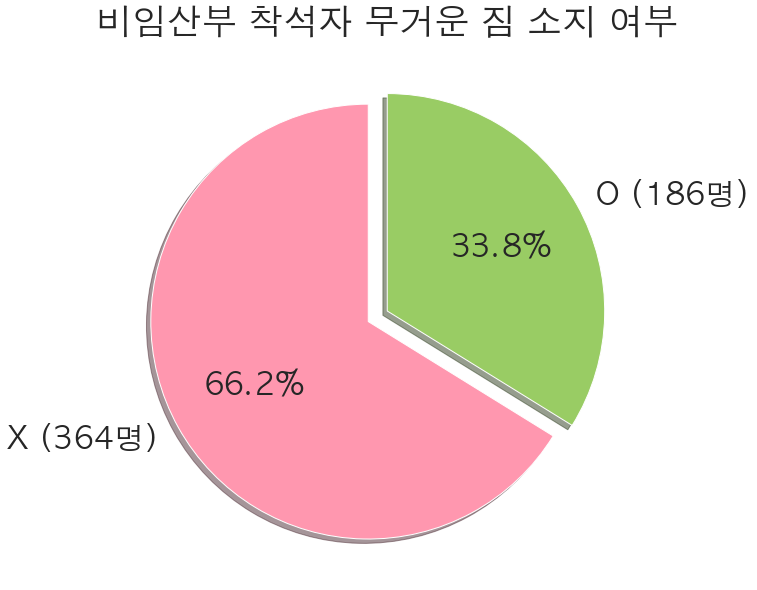

In [188]:
labels=['X (364명)', 'O (186명)']
not_p['heavy'].value_counts().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 30)
plt.title('비임산부 착석자 무거운 짐 소지 여부', fontsize=35)
pylab.ylabel('')

#### 1-2-5-1. 나이와 짐의 무게

In [189]:
heavy_age_dict = {'노년':'old_age', '중년':'middle_age', '청년':'youth', '청소년':'teenage', '어린이':'child'}
for key in heavy_age_dict.keys():
    print(key, ":",  round(len(not_p[(not_p[heavy_age_dict[key]]==1) & (not_p['heavy']==1)]) / len(not_p[(not_p[heavy_age_dict[key]]==1)])*100,2), "%")

노년 : 34.0 %
중년 : 33.33 %
청년 : 35.15 %
청소년 : 50.0 %
어린이 : 9.09 %


In [190]:
df_age_heavy=pd.DataFrame(not_p.groupby(['age','heavy'])['date'].size()).reset_index()
df_age_heavy = df_age_heavy.rename(columns={'age':'연령대', 'heavy':'짐', 'date':'인원수'})
df_age_heavy['짐'] = pd.Series(['가볍다', '무겁다','가볍다', '무겁다','가볍다', '무겁다','가볍다', '무겁다','가볍다', '무겁다'])
df_age_heavy

,연령대,짐,인원수
0,노년,가볍다,66
1,노년,무겁다,34
2,어린이,가볍다,10
3,어린이,무겁다,1
4,중년,가볍다,154
5,중년,무겁다,77
6,청년,가볍다,131
7,청년,무겁다,71
8,청소년,가볍다,3
9,청소년,무겁다,3


Text(0, 0.5, '')

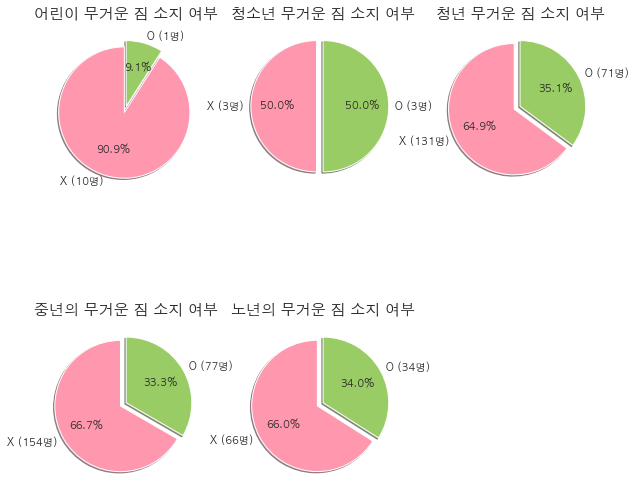

In [191]:
plt.subplot(231)
labels=['X (10명)', 'O (1명)']
not_p.loc[table['age'] == '어린이','heavy'].reset_index().groupby('heavy')['heavy'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 10)
plt.title('어린이 무거운 짐 소지 여부', fontsize=15)
pylab.ylabel('')

plt.subplot(232)
labels=['X (3명)', 'O (3명)']
not_p.loc[table['age'] == '청소년','heavy'].reset_index().groupby('heavy')['heavy'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 10)
plt.title('청소년 무거운 짐 소지 여부', fontsize=15)
pylab.ylabel('')

plt.subplot(233)
labels=['X (131명)', 'O (71명)']
not_p.loc[table['age'] == '청년','heavy'].reset_index().groupby('heavy')['heavy'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 10)
plt.title('청년 무거운 짐 소지 여부', fontsize=15)
pylab.ylabel('')

plt.subplot(234)
labels=['X (154명)', 'O (77명)']
not_p.loc[table['age'] == '중년','heavy'].reset_index().groupby('heavy')['heavy'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 10)
plt.title('중년의 무거운 짐 소지 여부', fontsize=15)
pylab.ylabel('')

plt.subplot(235)
labels=['X (66명)', 'O (34명)']
not_p.loc[table['age'] == '노년','heavy'].reset_index().groupby('heavy')['heavy'].count().plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,y='old_age_seat'
                    ,figsize=(10, 10)
                    ,fontsize = 10)
plt.title('노년의 무거운 짐 소지 여부', fontsize=15)
pylab.ylabel('')

#### 1-2-5-2. 비임산부의 무거운 짐 소지 여부와 임산부석 착석 비율

In [192]:
# E 상태일 때 무거운 짐이 있는 사람(1) vs 없는 사람(0)
E_heavy = len(table[(table['heavy'] == 1) & (table['E']==1)])
E_not_heavy= len(table[(table['heavy'] == 0) & (table['E']==1)])
table[(table['E']==1)].groupby('heavy').size().apply(lambda x: (x/(E_heavy + E_not_heavy)) * 100)

heavy
0.0    76.712329
1.0    23.287671
dtype: float64

In [193]:
# N 상태일 때 무거운 짐이 있는 사람(1) vs 없는 사람(0)
N_heavy = len(table[(table['heavy'] == 1) & (table['N']==1)])
N_not_heavy = len(table[(table['heavy'] == 0) & (table['N']==1)])
table[(table['N']==1)].groupby('heavy').size().apply(lambda x: (x/(N_heavy + N_not_heavy)) * 100)

heavy
0.0    59.493671
1.0    40.506329
dtype: float64

In [194]:
# F 상태일 때 무거운 짐이 있는 사람(1) vs 없는 사람(0)
F_heavy = len(table[(table['heavy'] == 1) & (table['F']==1)])
F_not_heavy = len(table[(table['heavy'] == 0) & (table['F']==1)])
table[(table['F']==1)].groupby('heavy').size().apply(lambda x: (x/(F_heavy + F_not_heavy)) * 100)

heavy
0.0    70.300752
1.0    29.699248
dtype: float64

In [195]:
sum_heavy_ENF = E_heavy+N_heavy+F_heavy
sum_not_heavy_ENF = E_not_heavy+N_not_heavy+F_not_heavy
heavy_ENF = pd.DataFrame({'무거운 짐 + 붐빔 정도':["사람 수", "비율"],
                        'E': [E_heavy, str(int((E_heavy/sum_heavy_ENF)*100))+"%"],
                          'N': [N_heavy, str(int((N_heavy/sum_heavy_ENF)*100))+"%"],
                          'F': [F_heavy, str(int((F_heavy/sum_heavy_ENF)*100))+"%"]})

not_heavy_ENF = pd.DataFrame({'가벼운 짐 + 붐빔 정도':["사람 수", "비율"],
                            'E': [E_not_heavy, str(int((E_not_heavy/sum_not_heavy_ENF)*100))+"%"],
                              'N': [N_not_heavy, str(int((N_not_heavy/sum_not_heavy_ENF)*100))+"%"],
                              'F': [F_not_heavy, str(int((F_not_heavy/sum_not_heavy_ENF)*100))+"%"]})

hENF = heavy_ENF.set_index('무거운 짐 + 붐빔 정도').T
nhENF = not_heavy_ENF.set_index('가벼운 짐 + 붐빔 정도').T
display(hENF.iloc[0:3])
display(nhENF.iloc[0:3])

무거운 짐 + 붐빔 정도,사람 수,비율
E,17,8%
N,96,50%
F,79,41%


가벼운 짐 + 붐빔 정도,사람 수,비율
E,56,14%
N,141,36%
F,187,48%


----
# 2. 임산부석이 비어있는 열차 내 환경 분석 : 붐빔 정도

## 2-1. 붐빔정도와 임산부석 착석 여부

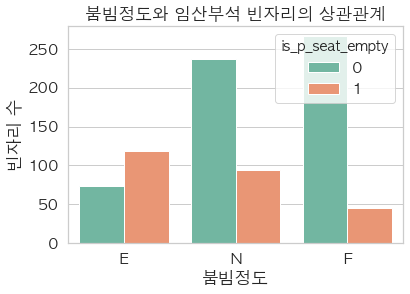

In [196]:
a = sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=table)
plt.title("붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [197]:
full.groupby('crowdedness')['date'].size()

crowdedness
E     73
F    266
N    237
Name: date, dtype: int64

In [198]:
table.groupby(['crowdedness','is_p_seat_empty'])['date'].size()

crowdedness  is_p_seat_empty
E            0                   73
             1                  118
F            0                  266
             1                   45
N            0                  237
             1                   94
Name: date, dtype: int64

In [199]:
table[table['E']==1].groupby('is_p_seat_empty')['date'].size().apply(lambda x: x/len(table[table['E']==1])*100)

is_p_seat_empty
0    38.219895
1    61.780105
Name: date, dtype: float64

In [200]:
table[table['N']==1].groupby('is_p_seat_empty')['date'].size().apply(lambda x: x/len(table[table['N']==1])*100)

is_p_seat_empty
0    71.601208
1    28.398792
Name: date, dtype: float64

In [201]:
table[table['F']==1].groupby('is_p_seat_empty')['date'].size().apply(lambda x: x/len(table[table['F']==1])*100)

is_p_seat_empty
0    85.530547
1    14.469453
Name: date, dtype: float64

In [202]:
# 임산부석이 비어있었던 역 구간의 개수 합계
table['p_seat_empty_count'].sum()

1110.0

In [203]:
# 임산부석이 비어있었던 시간 (역 개수 * 3분)
((table['p_seat_empty_count'].sum())*3)/60

55.5

In [204]:
#각 붐빔 정도마다 테이블 생성
empty = table[table['E']==1] 
normal = table[table['N']==1]
full = table[table['F']==1]

In [205]:
# 관찰 시간 내에, 열차 내 환경이 일반좌석이 비어 있을 때, 임산부석이 비어있던 역의 개수
empty[empty['is_p_seat_empty']==1]['p_seat_empty_count'].sum()

593.0

In [206]:
# 관찰 시간 내에, 열차 내 환경이 빈 좌석이 없고, 서있는 승객이 20명 이하일 때 임산부석이 비어있던 역의 개수
normal[normal['is_p_seat_empty']==1]['p_seat_empty_count'].sum()

337.0

In [207]:
# 관찰 시간 내에, 열차 내 환경이 빈 좌석이 없고, 서있는 승객이 20명 이상일 때 임산부석이 비어있던 역의 개수
full[full['is_p_seat_empty']==1]['p_seat_empty_count'].sum()

180.0

In [208]:
T1 = round(empty[empty['is_p_seat_empty']==1]['p_seat_empty_count'].sum()/table['p_seat_empty_count'].sum()*100,1).astype(int)
T2 = round(normal[normal['is_p_seat_empty']==1]['p_seat_empty_count'].sum()/table['p_seat_empty_count'].sum()*100,1).astype(int)
T3 = round(full[full['is_p_seat_empty']==1]['p_seat_empty_count'].sum()/table['p_seat_empty_count'].sum()*100,1).astype(int)

In [209]:
V = pd.Series([T1, T2, T3])

In [210]:
V

0    53
1    30
2    16
dtype: int64

Text(0, 0.5, '')

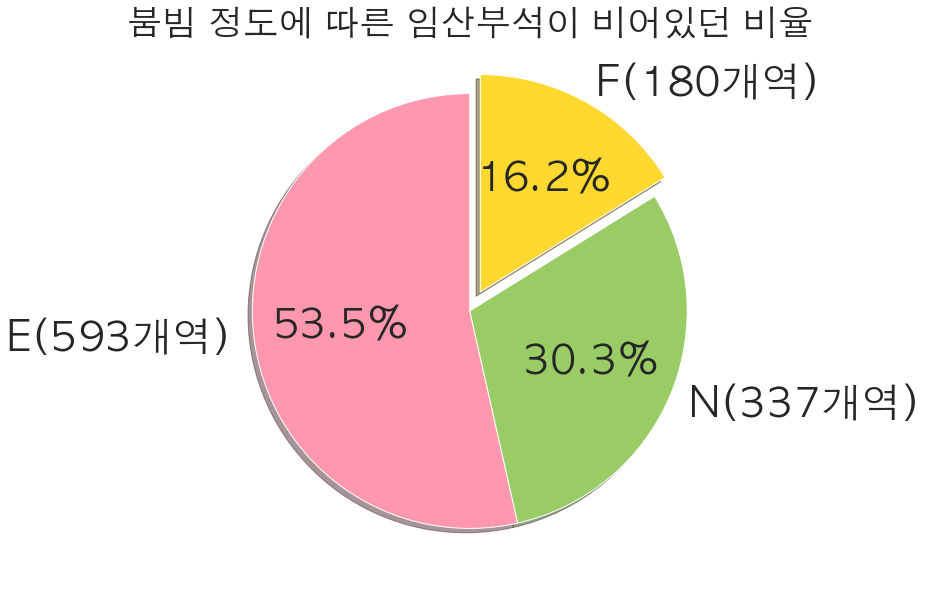

In [211]:
labels=['E(593개역)', 'N(337개역)', 'F(180개역)']
V.plot.pie(labels = labels
                    ,colors= ['#FF97AF', '#99CC64','#FFD92F']
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'   
                    ,subplots=True
                    ,explode = (0, 0, 0.1) 
                    ,figsize=(10, 10)
                    ,fontsize = 40)
plt.title('붐빔 정도에 따른 임산부석이 비어있던 비율', fontsize=35)
pylab.ylabel('')

### 2-1-1. 호선별 붐빔정도와 임산부석 착석 여부

In [212]:
# 임산부가 아닌 착석자 테이블 생성
not_empty = table[table['is_p_seat_empty']== 0]

In [213]:
not_pregnant = not_empty[not_empty['pregnant'] == 0]

In [214]:
not_pregnant['pregnant'].unique()

array([0.])

In [215]:
#전체 숫자 확인
pd.DataFrame(not_pregnant.groupby(['line','crowdedness'])['date'].size()).rename(columns={'date':'count_people'})

count_people
line crowdedness              
1    E                      23
     F                      99
     N                      86
2    E                       1
     N                       4
3    F                       1
5    E                      14
     F                      63
     N                      59
6    E                       9
     F                      15
     N                      53
7    E                      12
     F                      24
     N                      15
9    E                       1
     F                       5
     N                       2
10   E                       6
     F                      44
     N                      11
11   F                       3

In [216]:
# 각 호선별 붐빔정도에 따라 퍼센트를 구해줄 수 있는 함수 작성
def func_percentage(line):
    percentage = []
    for i in line['crowdedness'].unique():
        percentage.append(round(float(line[line['crowdedness'] == i]['count_people'])/line['count_people'].sum()*100,2))
    return percentage

In [217]:
# 라인별 착석자수로 이루어진 새로운 테이블 생성
# 퍼센트를 담을 list 생성
lines_total_counts = pd.DataFrame(not_pregnant.groupby(['line','crowdedness'])['date'].size()).reset_index().rename(columns={'date':'count_people'})
lines_total_counts

,line,crowdedness,count_people
0,1,E,23
1,1,F,99
2,1,N,86
3,2,E,1
4,2,N,4
5,3,F,1
6,5,E,14
7,5,F,63
8,5,N,59
9,6,E,9


In [218]:
lines_p_list = []

In [219]:
# 1호선
line1 = lines_total_counts[lines_total_counts['line'] == 1].copy()
line1['people_percentage'] = func_percentage(line1)
line1

,line,crowdedness,count_people,people_percentage
0,1,E,23,11.06
1,1,F,99,47.60
2,1,N,86,41.35


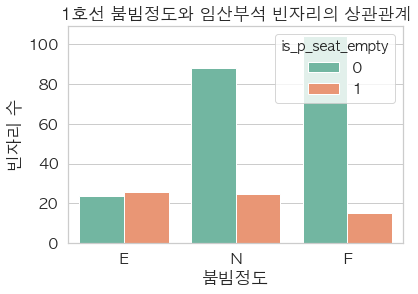

In [220]:
line1_data = pd.DataFrame(table[table['line'] == 1])
a = sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line1_data)
plt.title("1호선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [221]:
# 2호선
line2 = lines_total_counts[lines_total_counts['line'] == 2].copy()
line2['people_percentage'] = func_percentage(line2)
line2

,line,crowdedness,count_people,people_percentage
3,2,E,1,20.0
4,2,N,4,80.0


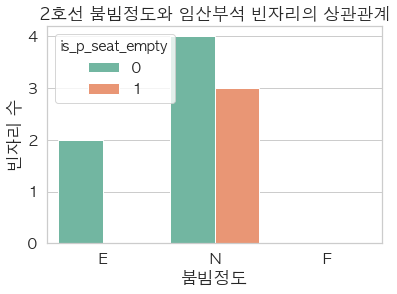

In [222]:
line2_data = pd.DataFrame(table[table['line'] == 2])
a = sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line2_data)
plt.title("2호선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [223]:
# 3호선
line3 = lines_total_counts[lines_total_counts['line'] == 3].copy()
line3['people_percentage'] = func_percentage(line3)
line3

,line,crowdedness,count_people,people_percentage
5,3,F,1,100.0


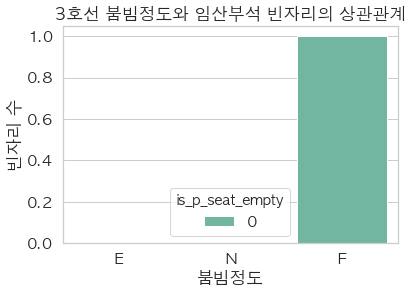

In [224]:
line3_data = pd.DataFrame(table[table['line'] == 3])
a= sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line3_data)
plt.title("3호선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [225]:
# 5호선
line5 = lines_total_counts[lines_total_counts['line'] == 5].copy()
line5['people_percentage'] = func_percentage(line5)
line5

,line,crowdedness,count_people,people_percentage
6,5,E,14,10.29
7,5,F,63,46.32
8,5,N,59,43.38


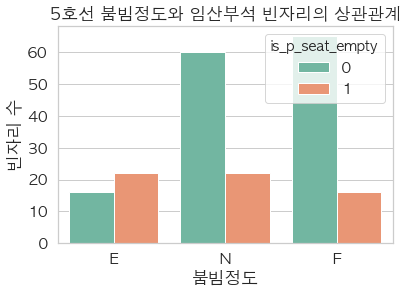

In [226]:
line5_data = pd.DataFrame(table[table['line'] == 5])
a = sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line5_data)
plt.title("5호선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [227]:
# 6호선
line6 = lines_total_counts[lines_total_counts['line'] == 6].copy()
line6['people_percentage'] = func_percentage(line6)
line6

,line,crowdedness,count_people,people_percentage
9,6,E,9,11.69
10,6,F,15,19.48
11,6,N,53,68.83


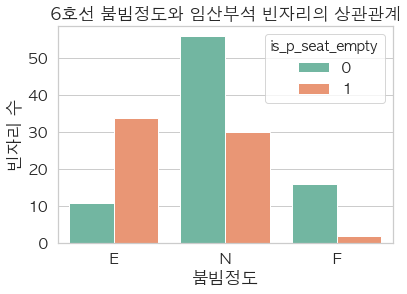

In [228]:
line6_data = pd.DataFrame(table[table['line'] == 6])
a = sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line6_data)
plt.title("6호선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [229]:
# 7호선
line7 = lines_total_counts[lines_total_counts['line'] == 7].copy()
line7['people_percentage'] = func_percentage(line7)
line7

,line,crowdedness,count_people,people_percentage
12,7,E,12,23.53
13,7,F,24,47.06
14,7,N,15,29.41


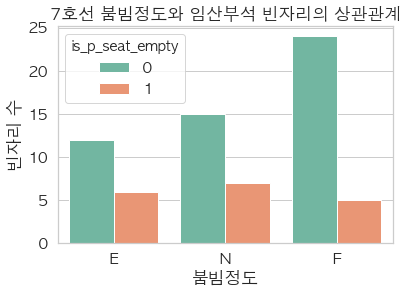

In [230]:
line7_data = pd.DataFrame(table[table['line'] == 7])
a = sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line7_data)
plt.title("7호선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [231]:
# 9호선
line9 = lines_total_counts[lines_total_counts['line'] == 9].copy()
line9['people_percentage'] = func_percentage(line9)
line9

,line,crowdedness,count_people,people_percentage
15,9,E,1,12.5
16,9,F,5,62.5
17,9,N,2,25.0


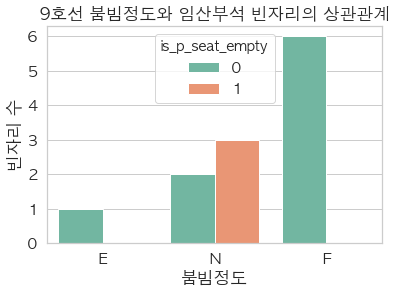

In [232]:
line9_data = pd.DataFrame(table[table['line'] == 9])
a= sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line9_data)
plt.title("9호선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [233]:
# 분당선
line10 = lines_total_counts[lines_total_counts['line'] == 10].copy()
line10['people_percentage'] = func_percentage(line10)
line10

,line,crowdedness,count_people,people_percentage
18,10,E,6,9.84
19,10,F,44,72.13
20,10,N,11,18.03


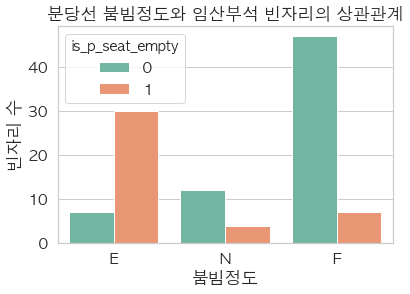

In [234]:
line10_data = pd.DataFrame(table[table['line'] == 10])
a= sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line10_data)
plt.title("분당선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [235]:
# 경의중앙선
line11 = lines_total_counts[lines_total_counts['line'] == 11].copy()
line11['people_percentage'] = func_percentage(line11)
line11

,line,crowdedness,count_people,people_percentage
21,11,F,3,100.0


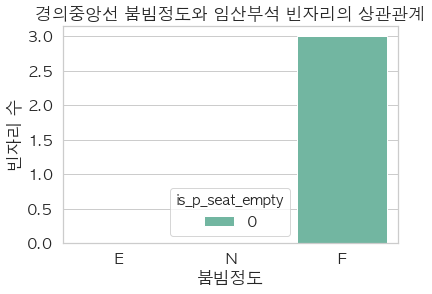

In [236]:
line11_data = pd.DataFrame(table[table['line'] == 11])
a =sns.countplot(x="crowdedness", hue="is_p_seat_empty", order=['E','N','F'], data=line11_data)
plt.title("경의중앙선 붐빔정도와 임산부석 빈자리의 상관관계")
a.set(xlabel='붐빔정도', ylabel='빈자리 수')
plt.show()

In [237]:
for i in lines_total_counts['line'].unique():
    percentages = func_percentage(lines_total_counts[lines_total_counts['line'] == i])
    for p in percentages:
        lines_p_list.append(p)
        

print(lines_p_list)

print(len(lines_p_list))
lines_total_counts['percentage'] = lines_p_list

[11.06, 47.6, 41.35, 20.0, 80.0, 100.0, 10.29, 46.32, 43.38, 11.69, 19.48, 68.83, 23.53, 47.06, 29.41, 12.5, 62.5, 25.0, 9.84, 72.13, 18.03, 100.0]
22


In [238]:
lines_total_counts

,line,crowdedness,count_people,percentage
0,1,E,23,11.06
1,1,F,99,47.60
2,1,N,86,41.35
3,2,E,1,20.00
4,2,N,4,80.00
5,3,F,1,100.00
6,5,E,14,10.29
7,5,F,63,46.32
8,5,N,59,43.38
9,6,E,9,11.69
